# Testing Beamshape Package

Import Things

In [50]:
import imageio.v3 as iio
import laserbeamsize as lbs
import numpy as np

import matplotlib.pyplot as plt

Folder where images are stored 

In [51]:
repo = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/'

Pixel size - from auto calibration in ImageJ

In [52]:
pixel_size_µm = 1 / 2.8704

Going to try and replicate beam waist fit using this package!

In [53]:
# array of distances at which images were collected
z1 = np.array([20.8, 19.2, 17.6, 16,  14.4, 12.8, 11.2,  9.6,  8,   6.4,  4.8,  3.2,  1.6,  0, -1.6, -3.2, -4.8 ,-6.4, -8, -9.6],dtype=float) # um

# array of filenames associated with each image
fn1 = [repo + "%dum.pgm" % number for number in z1]
print(fn1)

['C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/20um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/19um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/17um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/16um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/14um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/12um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Bac

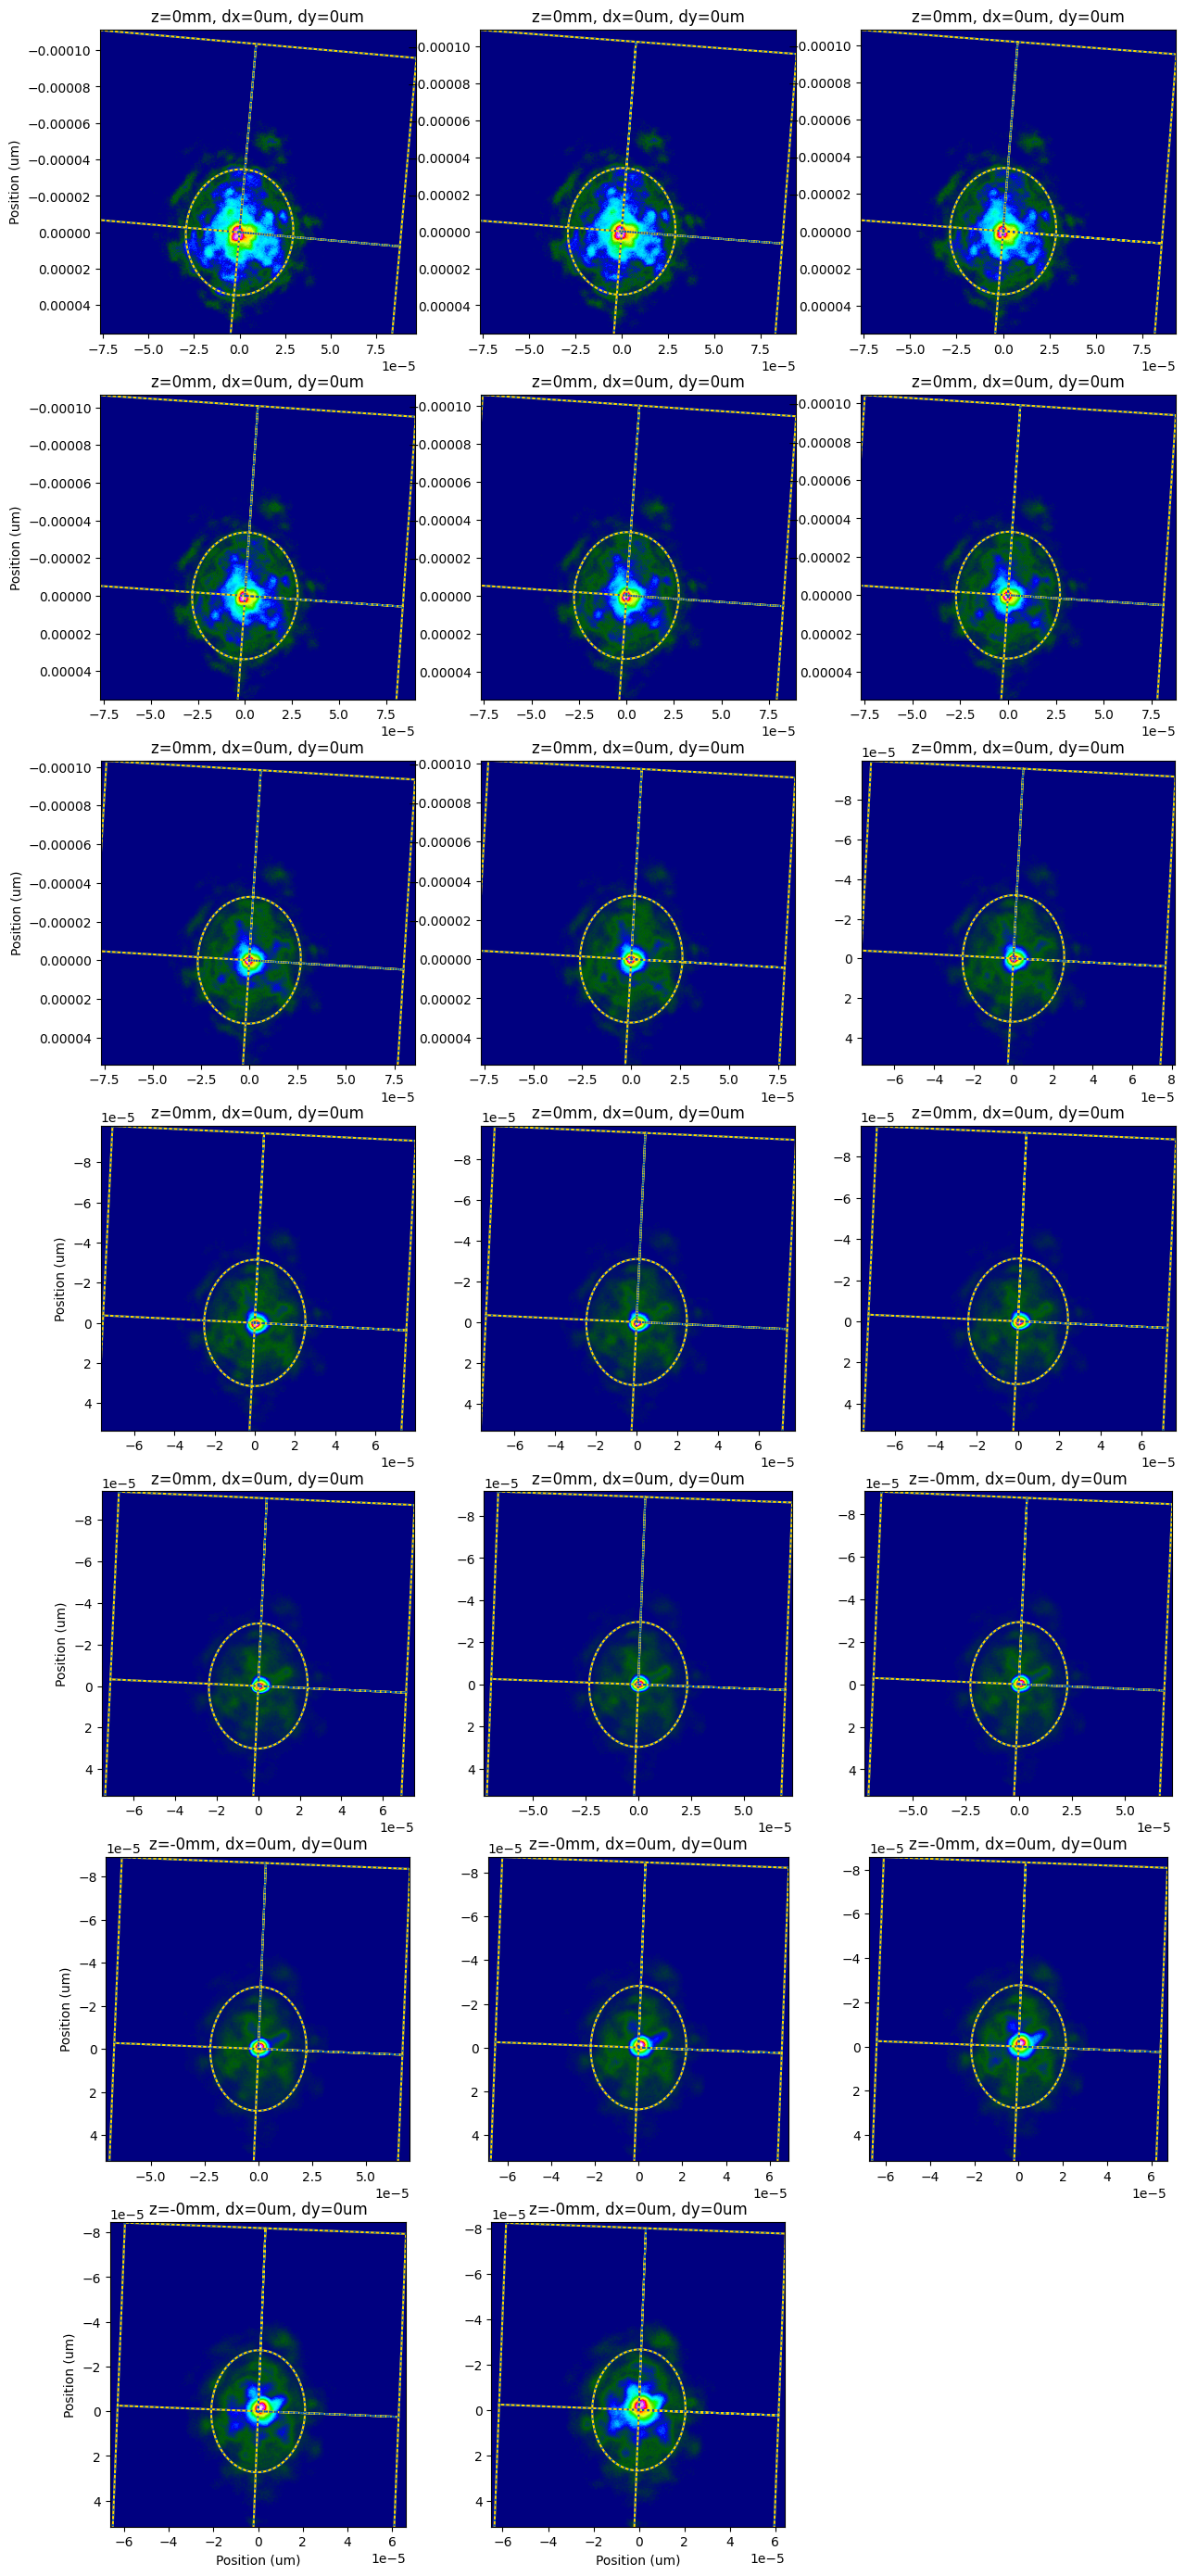

In [54]:
# read them all into memory
test_img = [iio.imread(fn) for fn in fn1]
dx,dy=lbs.plot_image_montage(test_img, z=z1*1e-6, pixel_size=pixel_size_µm*1e-6, units='um', crop=True, iso_noise=False)
plt.show()

rx = dx/2
ry = dy/2

In [55]:
print(dx)

[5.89371926e-05 5.80886987e-05 5.70431315e-05 5.59877118e-05
 5.51170366e-05 5.41851709e-05 5.32850772e-05 5.22799718e-05
 5.12400288e-05 5.03609011e-05 4.94524393e-05 4.85242775e-05
 4.75215748e-05 4.65713702e-05 4.56214574e-05 4.46427431e-05
 4.37253328e-05 4.27653916e-05 4.19383300e-05 4.10594893e-05]


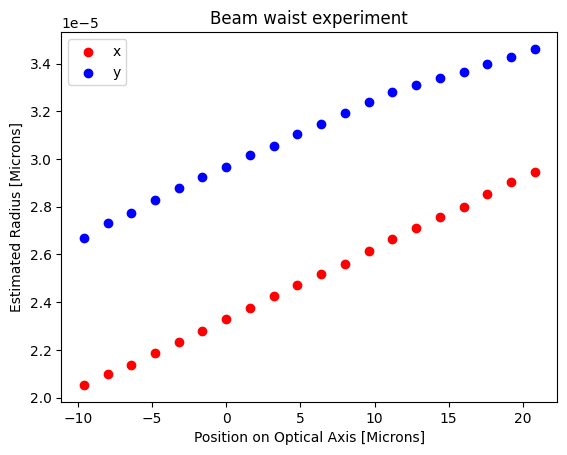

In [56]:
plt.scatter(z1, rx, color='red', label='x')
plt.scatter(z1, ry, color='blue', label='y')

plt.xlabel('Position on Optical Axis [Microns]')
plt.ylabel('Estimated Radius [Microns]')
plt.title("Beam waist experiment")
plt.legend()
plt.show()

In [57]:
print(z1)
print(rx)

[20.8 19.2 17.6 16.  14.4 12.8 11.2  9.6  8.   6.4  4.8  3.2  1.6  0.
 -1.6 -3.2 -4.8 -6.4 -8.  -9.6]
[2.94685963e-05 2.90443493e-05 2.85215658e-05 2.79938559e-05
 2.75585183e-05 2.70925855e-05 2.66425386e-05 2.61399859e-05
 2.56200144e-05 2.51804505e-05 2.47262197e-05 2.42621388e-05
 2.37607874e-05 2.32856851e-05 2.28107287e-05 2.23213716e-05
 2.18626664e-05 2.13826958e-05 2.09691650e-05 2.05297446e-05]
